In [3]:
import skimage as ski
import os 
import numpy as np
import skimage.io as io
import glob2 as glob

In [4]:
ff_root = "//Users/nick/Cole Trapnell's Lab Dropbox/Nick Lammers/Nick/morphseq/built_image_data/stitched_FF_images/"
bad_image_folder = "20240418"
good_image_folder = "20240411"

bad_images = sorted(glob.glob(os.path.join(ff_root, bad_image_folder, "*.png")))
good_images = sorted(glob.glob(os.path.join(ff_root, good_image_folder, "*.png")))

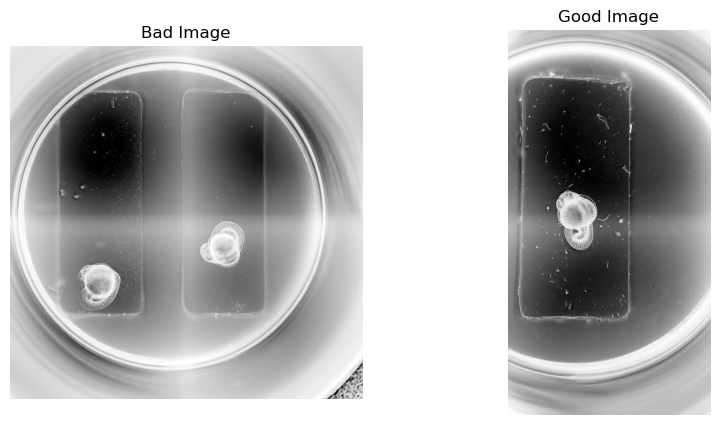

In [9]:
import matplotlib.pyplot as plt

bad_image = io.imread(bad_images[10])
good_image = io.imread(good_images[10])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Adjust the figure size as needed

# Display the bad image
axs[0].imshow(bad_image, cmap="gray")
axs[0].set_title('Bad Image')
axs[0].axis('off')  # Turn off axis labels

# Display the good image
axs[1].imshow(good_image, cmap="gray")
axs[1].set_title('Good Image')
axs[1].axis('off')  # Turn off axis labels

# Show the plot
plt.show()

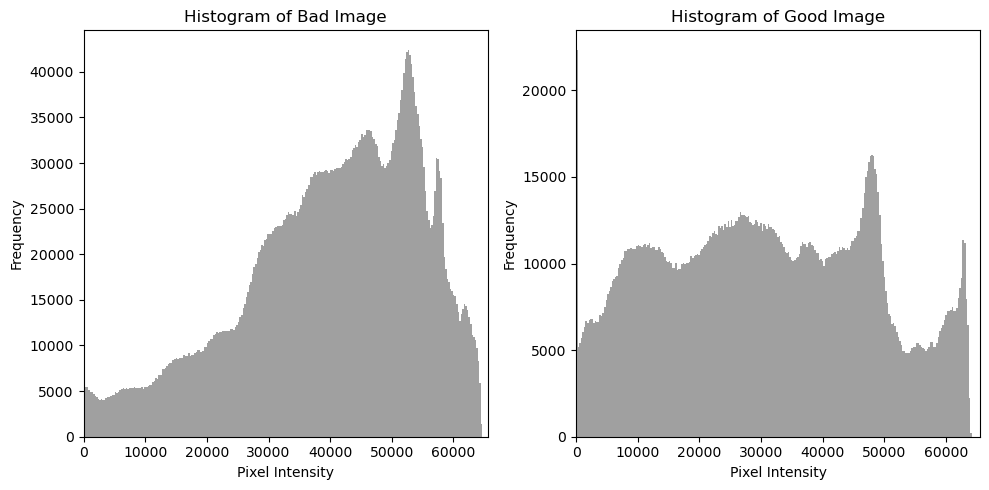

In [8]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram for the bad image
axs[0].hist(bad_image.ravel(), bins=256, color='gray', alpha=0.75)
axs[0].set_title('Histogram of Bad Image')
axs[0].set_xlim([0, 2**16])
axs[0].set_xlabel('Pixel Intensity')
axs[0].set_ylabel('Frequency')

# Plot histogram for the good image
axs[1].hist(good_image.ravel(), bins=256, color='gray', alpha=0.75)
axs[1].set_title('Histogram of Good Image')
axs[1].set_xlim([0, 2**16])
axs[1].set_xlabel('Pixel Intensity')
axs[1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

## Now let's experiment with some correction schemes to see if we can equalize the "bad" image

/Users/nick/miniforge3/envs/network-env/lib/python3.10/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 64720 fits in uint16
  return _convert(image, np.uint16, force_copy)


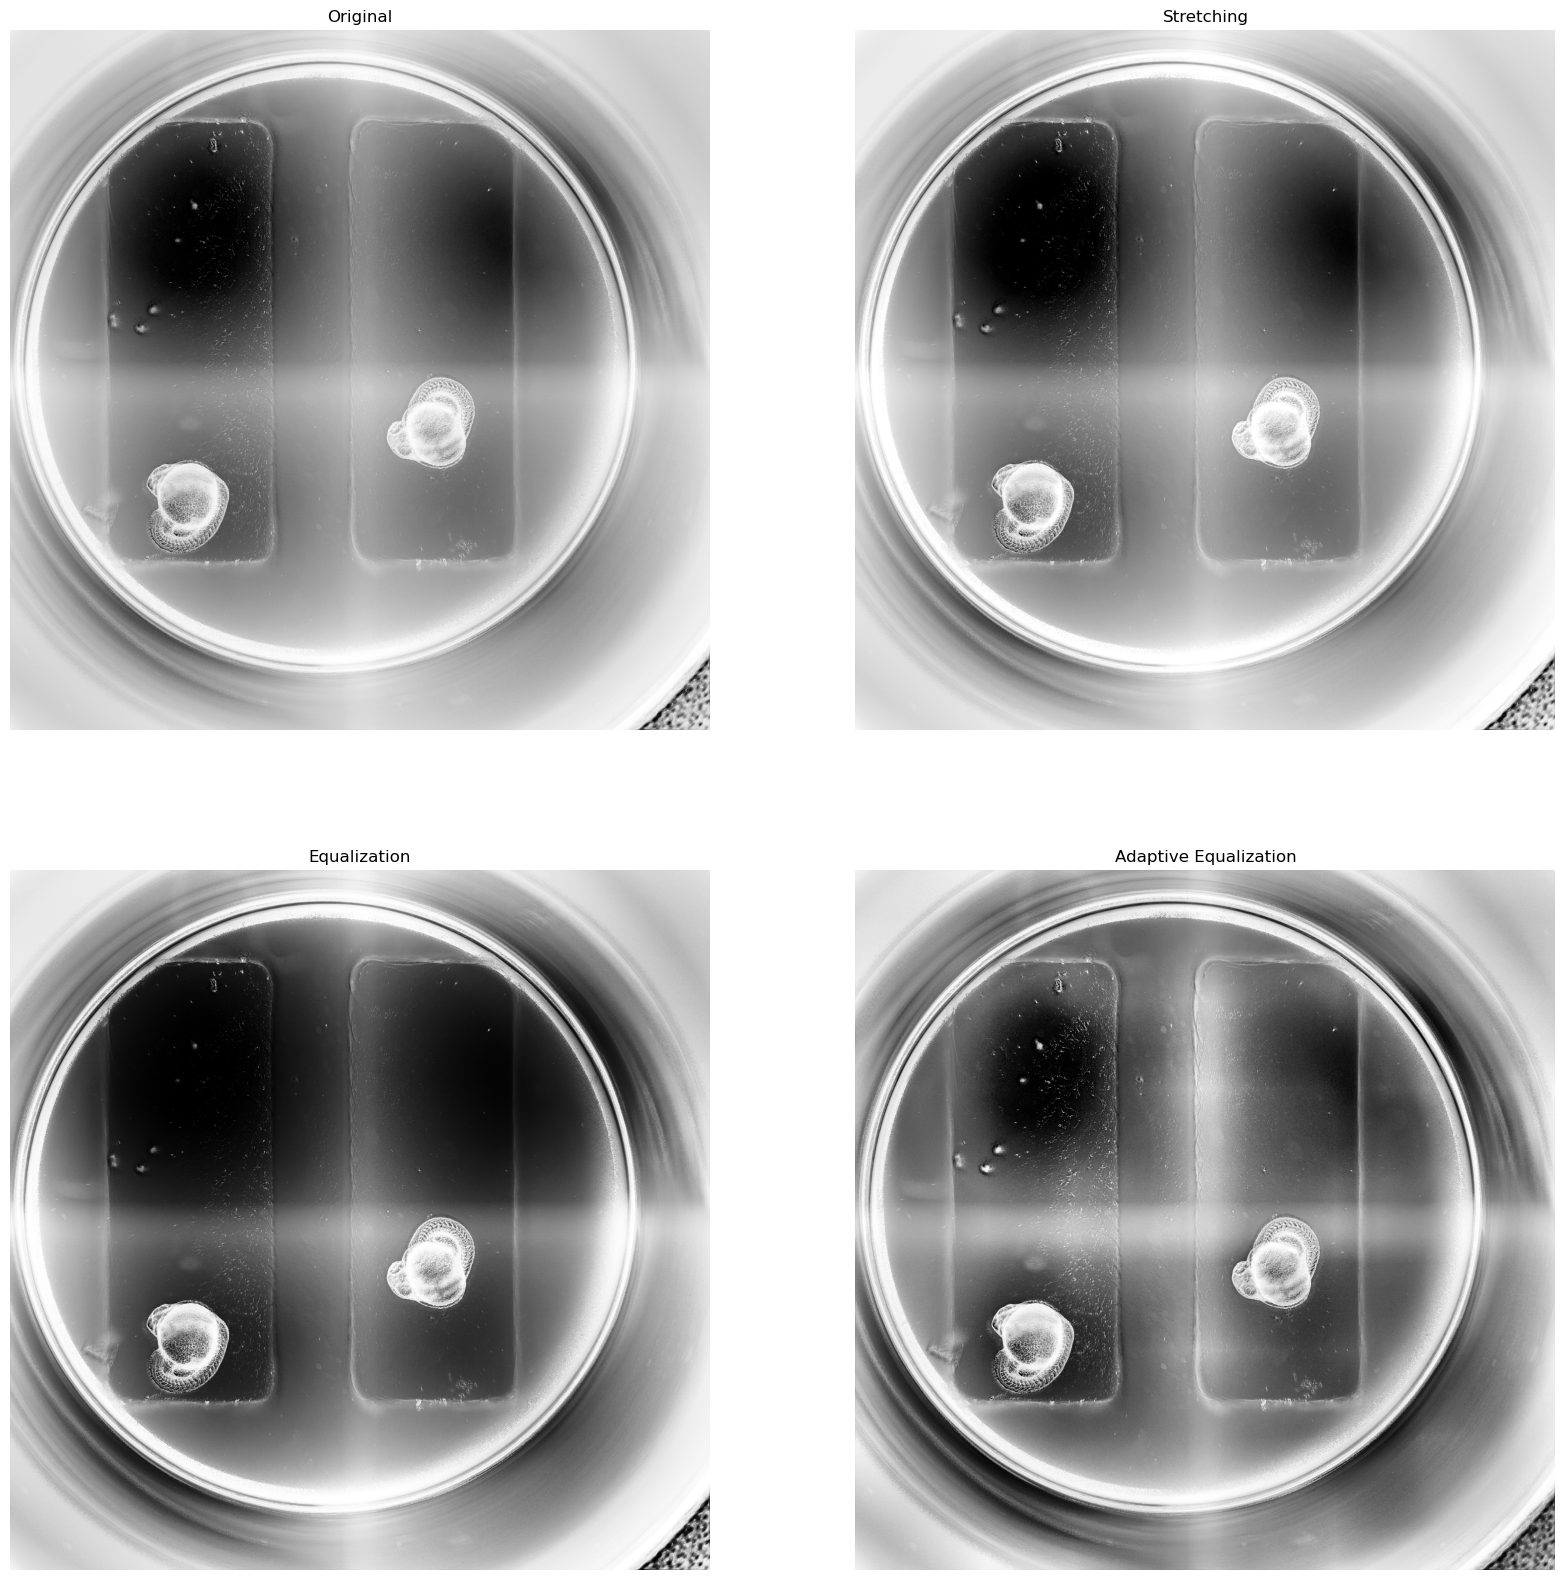

In [27]:
from skimage import exposure

# Contrast stretching
p2, p98 = np.percentile(bad_image, (2, 98))
bad_rescale = exposure.rescale_intensity(bad_image, in_range=(p2, p98))

# Equalization
bad_eq = exposure.equalize_hist(bad_image)

# Adaptive Equalization
bad_adapteq = exposure.equalize_adapthist(bad_image)


fig, axs = plt.subplots(2, 2, figsize=(20, 20))  # Adjust the figure size as needed

# Display the bad image
axs[0, 0].imshow(bad_image, cmap="gray")
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')  # Turn off axis labels

# Display the bad image
axs[0, 1].imshow(bad_rescale, cmap="gray")
axs[0, 1].set_title('Stretching')
axs[0, 1].axis('off')  # Turn off axis labels

# Display the good image
axs[1,0].imshow(bad_eq, cmap="gray")
axs[1,0].set_title('Equalization')
axs[1,0].axis('off')  # Turn off axis labels

axs[1,1].imshow(bad_adapteq, cmap="gray")
axs[1,1].set_title('Adaptive Equalization')
axs[1,1].axis('off')  # Turn off axis labels

# Show the plot
plt.show()

## Equalization and adaptive equalization both look encouraging...let's make sure they don't dramatically screw up "good" images

/Users/nick/miniforge3/envs/network-env/lib/python3.10/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 64186 fits in uint16
  return _convert(image, np.uint16, force_copy)


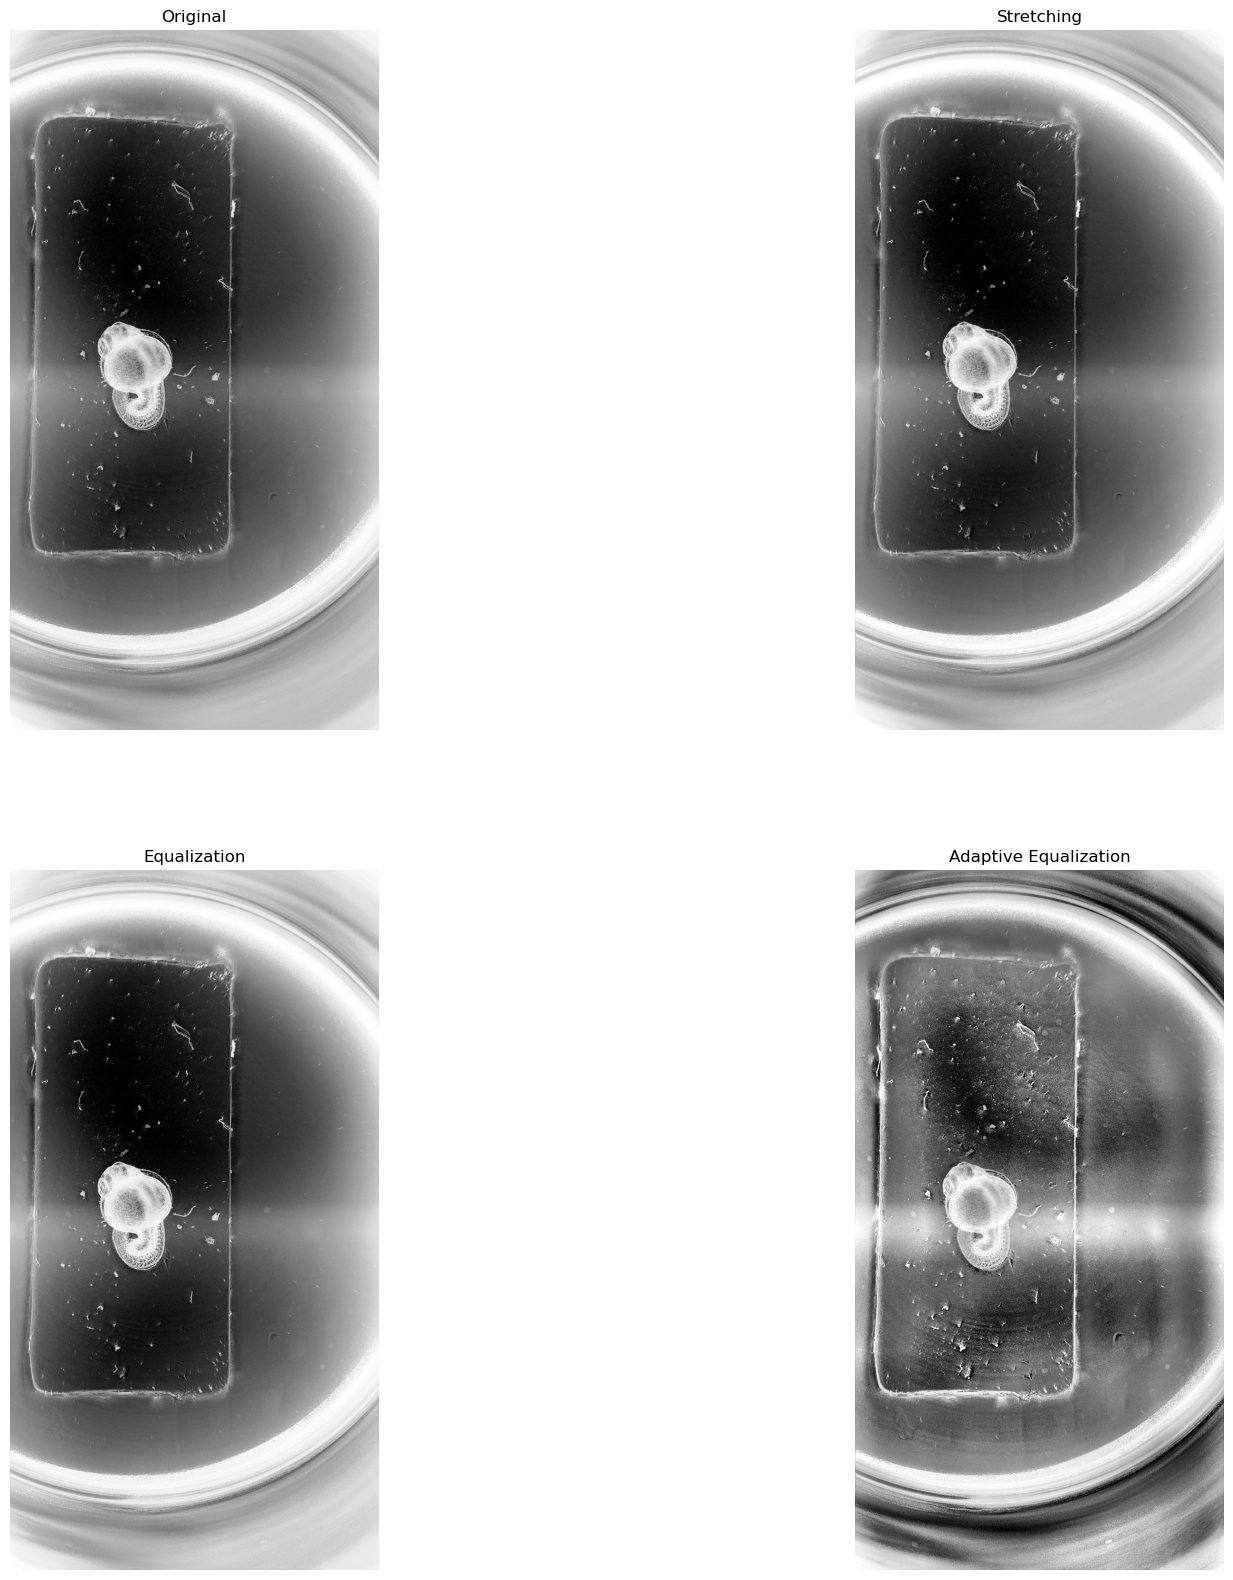

In [28]:
# Contrast stretching
p2, p98 = np.percentile(good_image, (2, 98))


good_rescale = exposure.rescale_intensity(good_image, in_range=(p2, p98))

# Equalization
good_eq = exposure.equalize_hist(good_image)

# Adaptive Equalization
good_adapteq = exposure.equalize_adapthist(good_image, clip_limit=0.03)


fig, axs = plt.subplots(2, 2, figsize=(20, 20))  # Adjust the figure size as needed

# Display the bad image
axs[0, 0].imshow(good_image, cmap="gray")
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')  # Turn off axis labels

# Display the bad image
axs[0, 1].imshow(good_rescale, cmap="gray")
axs[0, 1].set_title('Stretching')
axs[0, 1].axis('off')  # Turn off axis labels

# Display the good image
axs[1,0].imshow(good_eq, cmap="gray")
axs[1,0].set_title('Equalization')
axs[1,0].axis('off')  # Turn off axis labels

axs[1,1].imshow(good_adapteq, cmap="gray")
axs[1,1].set_title('Adaptive Equalization')
axs[1,1].axis('off')  # Turn off axis labels

# Show the plot
plt.show()

In [23]:
bad_adapteq = exposure.equalize_adapthist(bad_image)
bad_adapteq2 = exposure.equalize_adapthist(bad_adapteq)

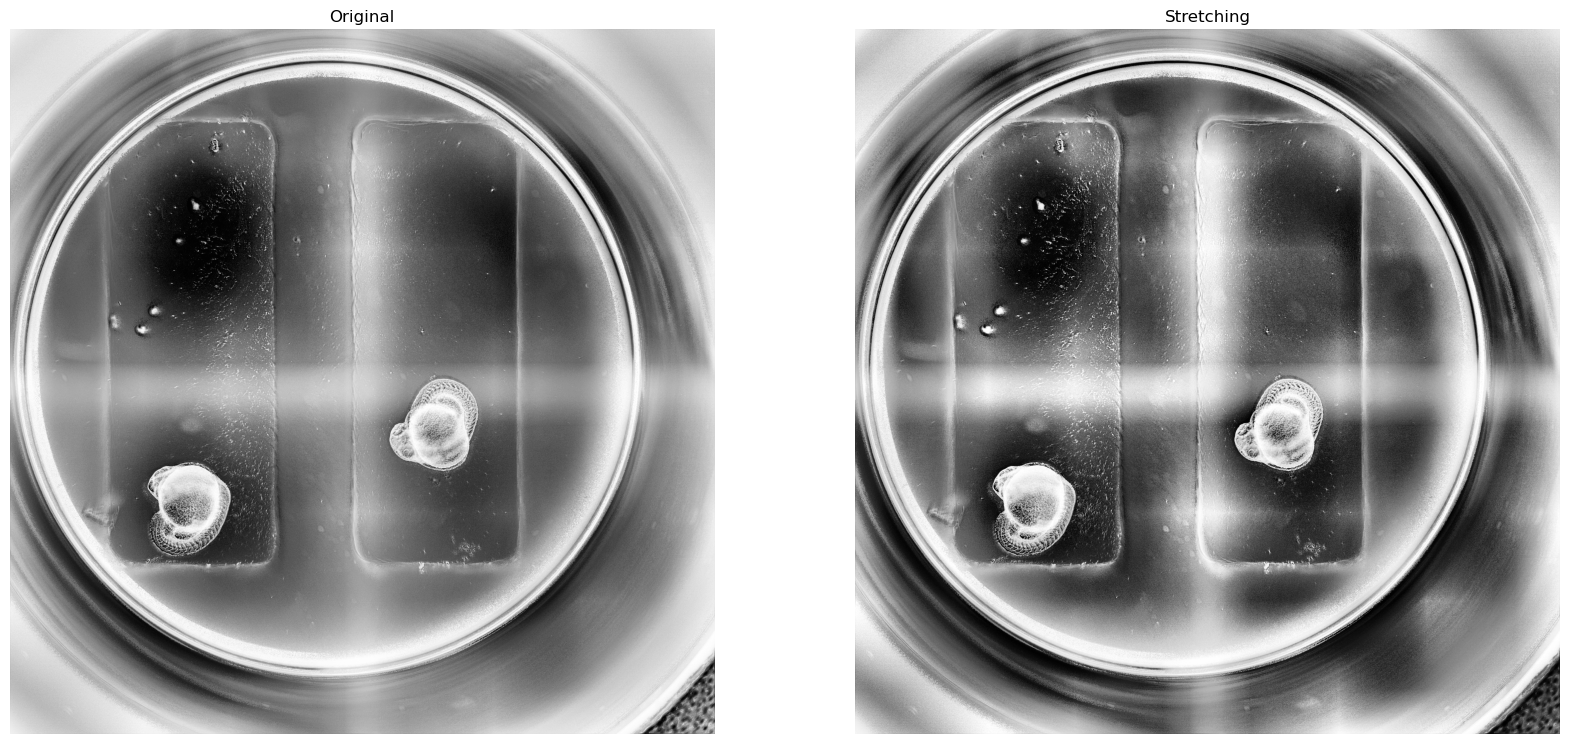

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figure size as needed

# Display the bad image
axs[0].imshow(bad_adapteq, cmap="gray")
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off axis labels

# Display the bad image
axs[1].imshow(bad_adapteq2, cmap="gray")
axs[1].set_title('Stretching')
axs[1].axis('off')  # Turn off axis labels

plt.show()